<a href="https://colab.research.google.com/github/akshayalivi/Customer_segmentation/blob/main/Customer_Segmentation_using_RFM_Analysis_and_KMeans_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd
import numpy as np

In [6]:
df = pd.read_csv("/OnlineRetail.csv.zip", encoding='latin-1')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [8]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [9]:
df.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,1454
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,135080
Country,0


In [11]:
df = df.dropna(subset=['CustomerID'])

In [12]:
df = df[df['Quantity'] > 0]

In [13]:
df = df[df['UnitPrice'] > 0]

In [14]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [18]:
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']

In [19]:
df.head()
df.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID,TotalPrice
count,397884.000000,397884,397884.000000,397884.000000,397884.000000
mean,12.988238,2011-07-10 23:41:23.511023360,3.116488,15294.423453,22.397000
min,1.000000,2010-12-01 08:26:00,0.001000,12346.000000,0.001000
25%,2.000000,2011-04-07 11:12:00,1.250000,13969.000000,4.680000
50%,6.000000,2011-07-31 14:39:00,1.950000,15159.000000,11.800000
75%,12.000000,2011-10-20 14:33:00,3.750000,16795.000000,19.800000
max,80995.000000,2011-12-09 12:50:00,8142.750000,18287.000000,168469.600000
std,179.331775,NaN,22.097877,1713.141560,309.071041


In [20]:
reference_date = df['InvoiceDate'].max() + pd.Timedelta(days=1)
reference_date

Timestamp('2011-12-10 12:50:00')

In [22]:
rfm = df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (reference_date - x.max()).days,
    'InvoiceNo': 'nunique',
    'TotalPrice': 'sum'
})

In [23]:
rfm.columns = ['Recency', 'Frequency', 'Monetary']
rfm.head()

,Recency,Frequency,Monetary
CustomerID,,,
12346.0,326,1,77183.60
12347.0,2,7,4310.00
12348.0,75,4,1797.24
12349.0,19,1,1757.55
12350.0,310,1,334.40


In [24]:
rfm.describe()

,Recency,Frequency,Monetary
count,4338.000000,4338.000000,4338.000000
mean,92.536422,4.272015,2054.266460
std,100.014169,7.697998,8989.230441
min,1.000000,1.000000,3.750000
25%,18.000000,1.000000,307.415000
50%,51.000000,2.000000,674.485000
75%,142.000000,5.000000,1661.740000
max,374.000000,209.000000,280206.020000


In [29]:
from sklearn.preprocessing import StandardScaler

In [31]:
scaler = StandardScaler()

In [32]:
rfm_scaled = scaler.fit_transform(rfm)

In [33]:
rfm_scaled = pd.DataFrame(rfm_scaled, columns=rfm.columns, index=rfm.index)
rfm_scaled.head()

,Recency,Frequency,Monetary
CustomerID,,,
12346.0,2.334574,-0.425097,8.358668
12347.0,-0.905340,0.354417,0.250966
12348.0,-0.175360,-0.035340,-0.028596
12349.0,-0.735345,-0.425097,-0.033012
12350.0,2.174578,-0.425097,-0.191347


In [34]:
rfm_scaled.describe()

,Recency,Frequency,Monetary
count,4.338000e+03,4.338000e+03,4.338000e+03
mean,2.702618e-17,1.801745e-17,1.801745e-17
std,1.000115e+00,1.000115e+00,1.000115e+00
min,-9.153401e-01,-4.250965e-01,-2.281344e-01
25%,-7.453445e-01,-4.250965e-01,-1.943495e-01
50%,-4.153533e-01,-2.951776e-01,-1.535104e-01
75%,4.946227e-01,9.457903e-02,-4.367134e-02
max,2.814561e+00,2.659803e+01,3.094634e+01


In [35]:
from sklearn.cluster import KMeans

In [37]:
wcss = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(rfm_scaled)
    wcss.append(kmeans.inertia_)

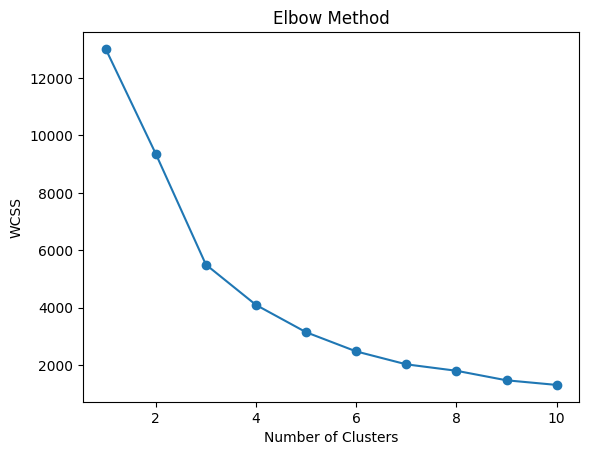

In [38]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(range(1,11), wcss, marker='o')

plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')

plt.show()

In [39]:
kmeans = KMeans(n_clusters=4, random_state=42)
rfm['Cluster'] = kmeans.fit_predict(rfm_scaled)

In [40]:
rfm['Cluster'].value_counts()

,count
Cluster,
0,3054
1,1067
3,204
2,13


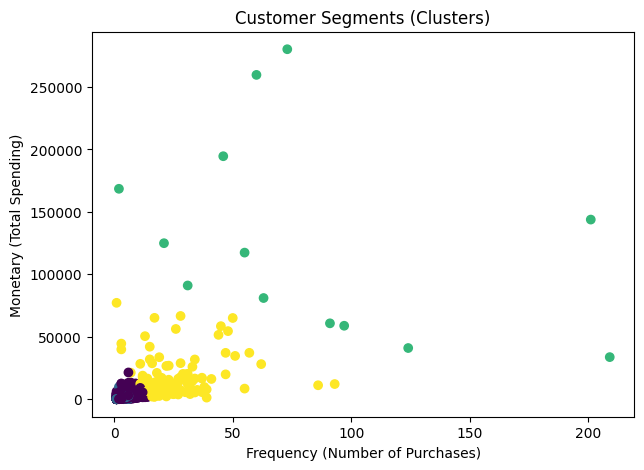

In [41]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7,5))

plt.scatter(
    rfm['Frequency'],
    rfm['Monetary'],
    c=rfm['Cluster']   # color by cluster
)

plt.title('Customer Segments (Clusters)')
plt.xlabel('Frequency (Number of Purchases)')
plt.ylabel('Monetary (Total Spending)')

plt.show()

In [42]:
cluster_summary = rfm.groupby('Cluster').mean()
cluster_summary

,Recency,Frequency,Monetary
Cluster,,,
0,43.702685,3.682711,1359.049284
1,248.075914,1.552015,480.617480
2,7.384615,82.538462,127338.313846
3,15.500000,22.333333,12709.090490


In [43]:
cluster_names = {
    0: 'Low Value Customers',
    1: 'Regular Customers',
    2: 'VIP Customers',
    3: 'At Risk Customers'
}

rfm['Segment'] = rfm['Cluster'].map(cluster_names)
rfm.head()

,Recency,Frequency,Monetary,Cluster,Segment
CustomerID,,,,,
12346.0,326,1,77183.60,3,At Risk Customers
12347.0,2,7,4310.00,0,Low Value Customers
12348.0,75,4,1797.24,0,Low Value Customers
12349.0,19,1,1757.55,0,Low Value Customers
12350.0,310,1,334.40,1,Regular Customers


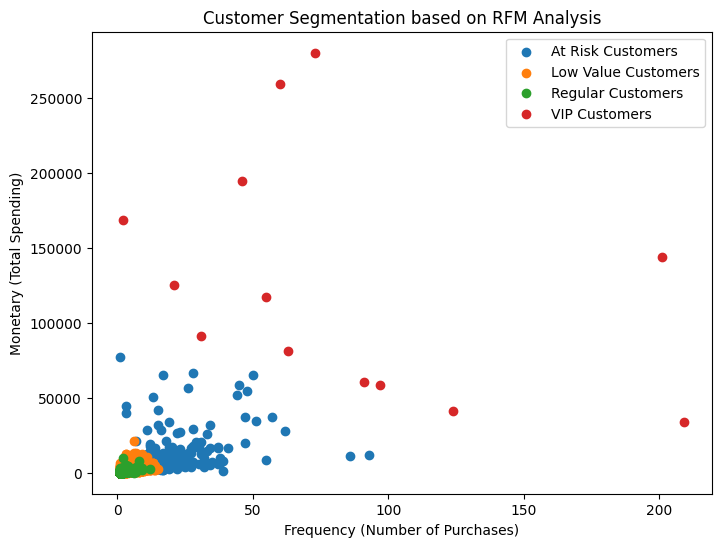

In [44]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))

# plot each segment separately
for segment in rfm['Segment'].unique():
    data = rfm[rfm['Segment'] == segment]
    plt.scatter(
        data['Frequency'],
        data['Monetary'],
        label=segment
    )

plt.title('Customer Segmentation based on RFM Analysis')
plt.xlabel('Frequency (Number of Purchases)')
plt.ylabel('Monetary (Total Spending)')

plt.legend()
plt.show()